# Predictive maintenance using machine learning algorithms(by logistic regression)

Before discussing multiclass logistic regression, we will briefly mention logistic regression. Logistic regression is a binary classification technique that uses logistic function (1/(1+e^-x))to fit data. Contrary to linear regression where the output is a numerical value, in logistic regression the output is a probability scores of an input belonging to a particular class.

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#reading data
data = pd.read_csv("/content/drive/MyDrive/feature_time_48k_2048_load_1.csv")
data['fault'] = pd.Categorical(data['fault'])
#Divide the data into training data and test data
train_data, test_data = train_test_split(data, test_size = 0.2, stratify = data['fault'],
    random_state = 324)
#data processing
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_data.iloc[:,:-1])
test_scaled = (test_data.iloc[:,:-1].values - scaler.mean_)/np.sqrt(scaler.var_)

In [3]:
#model logistic regression
model_logistic = LogisticRegression(C = 500, max_iter = 200, n_jobs = -1)
model_logistic.fit(train_scaled, train_data['fault'])

LogisticRegression(C=500, max_iter=200, n_jobs=-1)

In [4]:
#prediction model by train data
train_predictions = model_logistic.predict(train_scaled)
#prediction model by test data
test_predictions = model_logistic.predict(test_scaled)

In [5]:
#confultion matrix by train and test
train_confu_matrix = confusion_matrix(train_data['fault'], train_predictions)
test_confu_matrix = confusion_matrix(test_data['fault'], test_predictions)

<function matplotlib.pyplot.show(*args, **kw)>

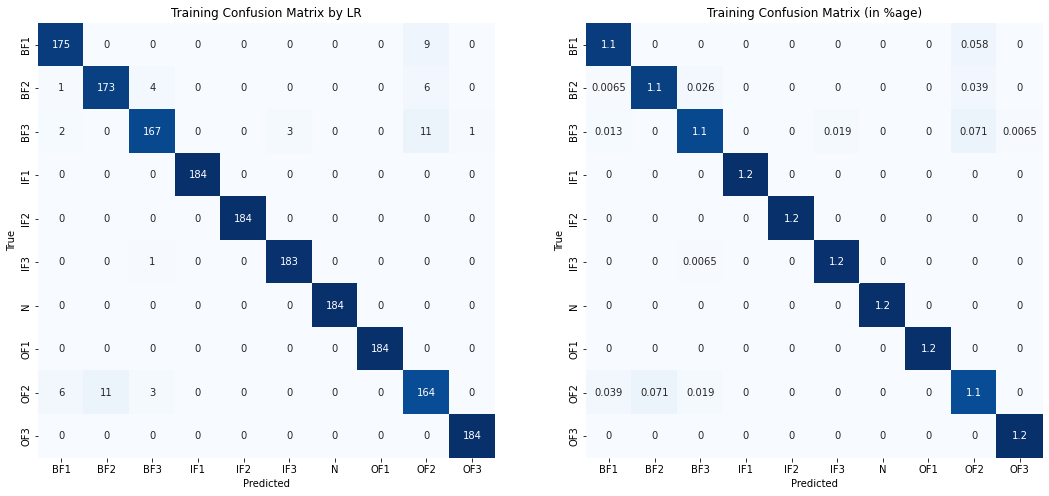

In [6]:
#Types of faults to be classified
fault_type = ['BF1','BF2','BF3','IF1','IF2','IF3','N','OF1','OF2','OF3']
#drawing order of confution matrix by train data
plt.figure(1,figsize=(18,8))
plt.subplot(121)
#Here we specify the table to be drawn
sns.heatmap(train_confu_matrix, annot= True,fmt = "d",
#Define the colors and labels on the x and y axis
xticklabels= fault_type , yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Training Confusion Matrix by LR')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.subplot(122)
#We repeat the first drawing, but in the form of a percentage
sns.heatmap(train_confu_matrix/155, annot= True,
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Training Confusion Matrix (in %age)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show

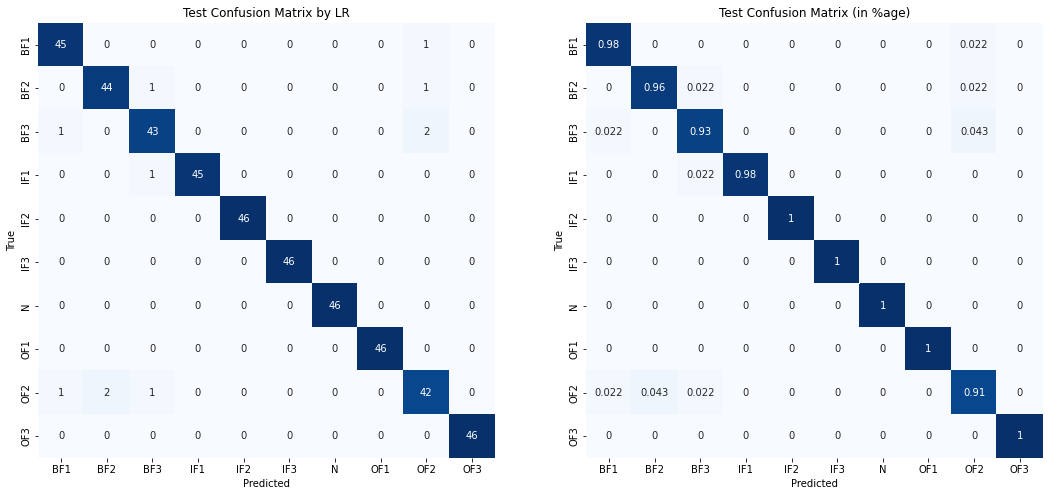

In [7]:
#drawing order
plt.figure(2,figsize=(18,8))
plt.subplot(121)
#Here we specify the table to be drawn
sns.heatmap(test_confu_matrix, annot = True,
#Define the colors and labels on the x and y axis
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Test Confusion Matrix by LR')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.subplot(122)
#We repeat the first drawing, but in the form of a percentage
sns.heatmap(test_confu_matrix/46, annot = True,
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Test Confusion Matrix (in %age)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [8]:
#Accuracy by model
test_accuracy_LR = accuracy_score(test_data['fault'], test_predictions)
print("test accuracy by LR: ", test_accuracy_LR)

test accuracy by LR:  0.9760869565217392
